## Bike Sharing Assignment

Problem Statement:- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. So, the company wants to understand the factors affecting the demand for these shared bikes in the American market.

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# To supress warnings 
import warnings 
warnings.filterwarnings('ignore')

### Reading and Understanding the Data

In [3]:
# Read the bike dataset 
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check the number of rows and columns
bike_df.shape

(730, 16)

In [5]:
# Check the information of the columns
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Check the statistics of numerial coulmns
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Check the null valued columns 
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing values in the dataset

In [8]:
# Column 'instant' is insignificant. Hence dropping it.
bike_df = bike_df.drop('instant',axis=1)
bike_df.shape

(730, 15)

In [9]:
# Addition of casual & registered columns is presented by cnt column hence dropping these two as well.
bike_df.drop(['casual', 'registered'],axis=1,inplace=True)
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Coulmn 'dteday' does much significance as we're given smiliar columns like yr,mnth,weekday. 
bike_df.drop('dteday',axis=1,inplace=True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Renaming columns - yr, mnth, hum and cnt for better understanding. 
bike_df.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True)
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Mapping categorical variables - season, month, weekday and weathersit into meaningful names. 
bike_df.season = bike_df.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike_df.month = bike_df.month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike_df.weekday = bike_df.weekday.map({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 0:'Sun'})
bike_df.weathersit = bike_df.weathersit.map({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Heavy Rain_snow'})
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Exploratory Data Analysis 

##### Univariate Analysis of Categorical Variables

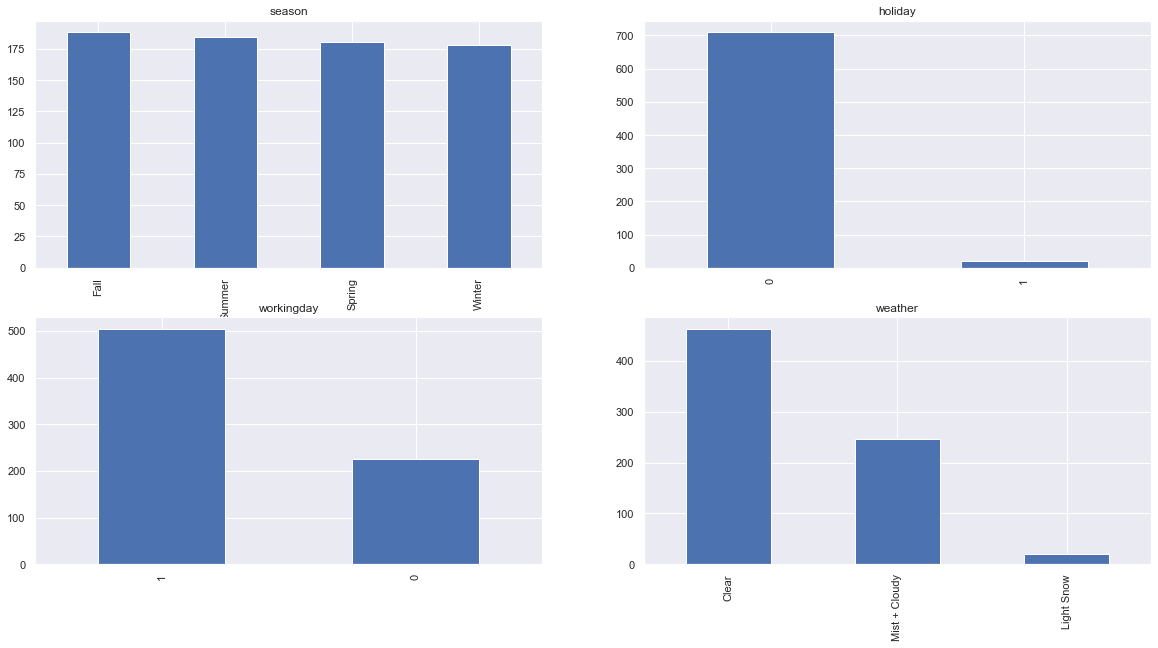

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
bike_df['season'].value_counts().plot(kind='bar')
plt.title('season')


plt.subplot(2,2,2)
bike_df['holiday'].value_counts().plot(kind='bar')
plt.title('holiday')


plt.subplot(2,2,3)
bike_df['workingday'].value_counts().plot(kind='bar')
plt.title('workingday')


plt.subplot(2,2,4)
bike_df['weathersit'].value_counts().plot(kind='bar')
plt.title('weather')
plt.show()

Inference -

    > Working days/non-holidays are favourable for bike renting. 
    > Light snow / Heavy rains accompained by ice pellets are least favourable weather conditions for bike rentals. 
    > Minimun number of bookings are observed in Winters.

##### Univariate Analysis of Numeric Variables

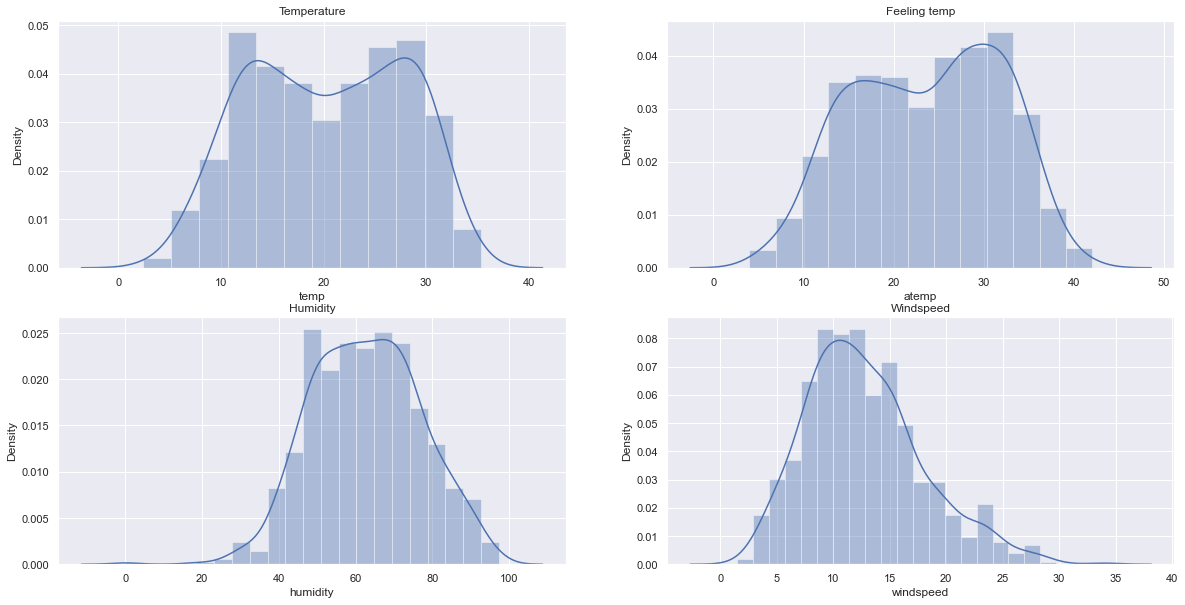

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(bike_df.temp)
plt.title('Temperature')

plt.subplot(2,2,2)
sns.distplot(bike_df.atemp)
plt.title('Feeling temp')

plt.subplot(2,2,3)
sns.distplot(bike_df.humidity)
plt.title('Humidity')

plt.subplot(2,2,4)
sns.distplot(bike_df.windspeed)
plt.title('Windspeed')
plt.show() 

##### Bivariate Analysis of Categorical Variables

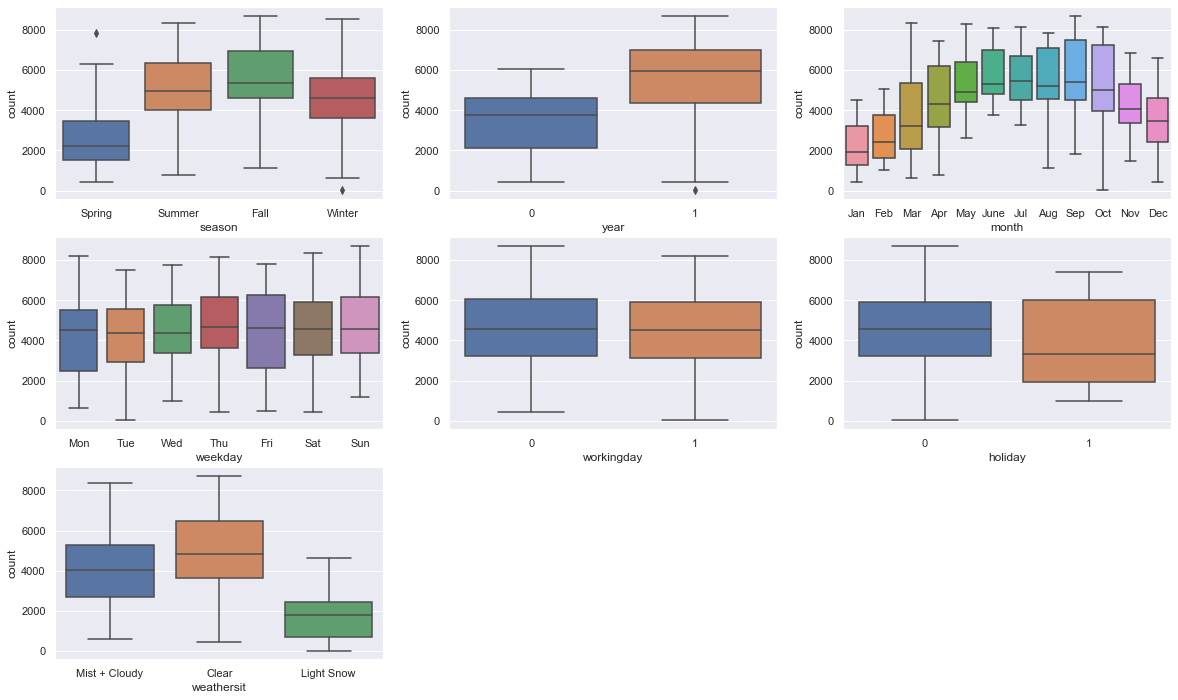

In [15]:
# Relationship between categorical variables w.r.t Target vaiable. 
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike_df) 
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'count', data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'count', data = bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'count', data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'count', data = bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'count', data = bike_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'count', data = bike_df)
plt.show()

Inference - 

    > Bike Rentals are highest in Fall season. 
    > Bike Rental demand has gone up in year 2019.
    > Bike booking more when the weather is 'Clear'.
    > Bike booking have significantly gone up between the month of May and September.
    > Most of the booking are happening during non-holiday time. 
    > Days of the week doesn't matter much. Almost similar number of bikes are rented same number of times everyday in a week 
      but Monday and tuesday have relatively less bookings.

##### Bivariate Analysis of Numerical Variables 

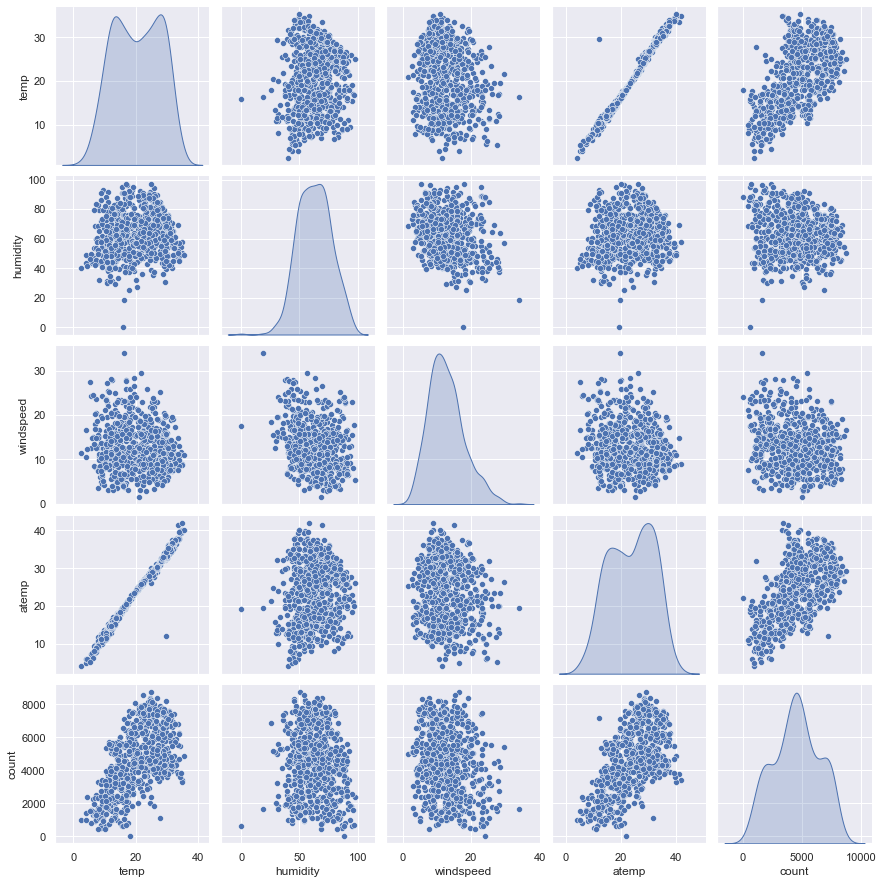

In [16]:
# Generating a pairplot for the Numeric variables.
sns.pairplot(bike_df, vars=['temp', 'humidity', 'windspeed', 'atemp', 'count'], diag_kind = 'kde')
plt.show()

Inference  

    > Bike rentals are more correlated to temperature. 
    > Huge correlation between temp and atemp. Hence, only one of the 2 variables will be in the model.
    > temp/atemp shows some linear relationship with count.
    > Humidity and windspeed doesn't show much of a linear relationship with count.

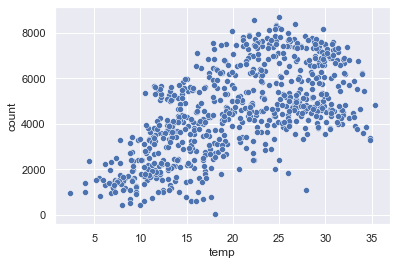

In [17]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='count' ,data=bike_df)
plt.show()

- Bike rentals are significantly more at higher temperatures. 

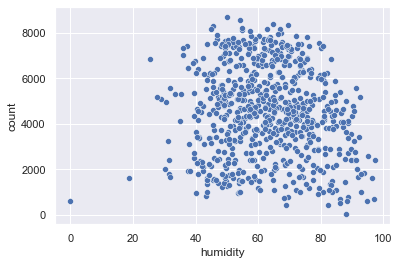

In [18]:
#scatter plot for humidity to count
sns.scatterplot(x='humidity',y='count' ,data=bike_df)
plt.show()

- Bike rentals are more at high humidity

##### Multivariate Analysis

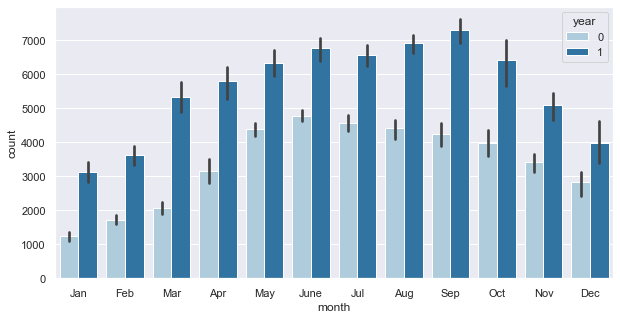

In [19]:
# Relationship between month, year and target variable. 
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=bike_df,palette='Paired')
plt.show()

- We can see there is significant rise in bike bookings from May to September then it falls.

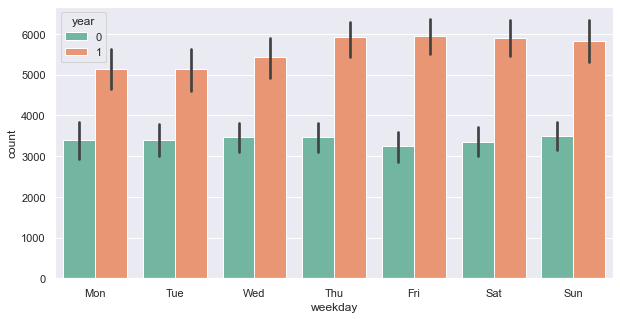

In [20]:
# Relationship between weekday, year and target variable. 
plt.figure(figsize=(10,5))
sns.barplot('weekday','count',hue='year',data=bike_df, palette = 'Set2')
plt.show()

- For year 2019, we see a rise in number of booking from Wednesday to Thursday followed by Fridays and Saturdays.

##### Correlation Matrix

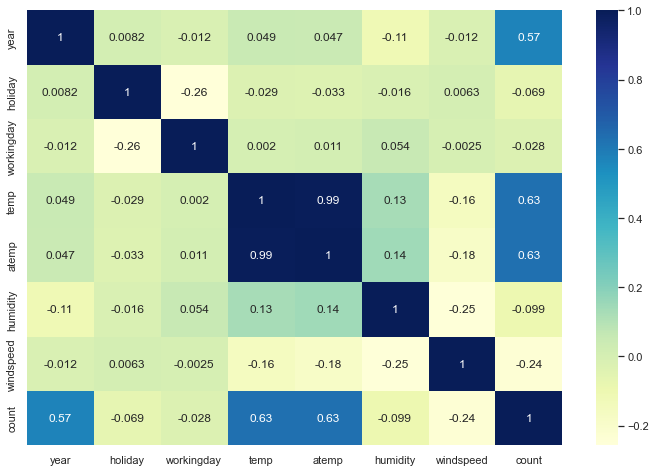

In [21]:
#Checking the colinearlity amongst the variables. 
plt.figure(figsize=(12,8))
sns.heatmap(bike_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

Inference - 

    > It is observed that atemp and temp are highly correlated and one can be dropped to avoid multicollinearity.

In [22]:
#Dropping atemp column
bike_df=bike_df.drop('atemp',axis=1)

In [23]:
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,Spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


### Data Preparation 

##### Dummy Variable creation


In [24]:
# Get the dummy variables for month, season, weathersit, weekday and drop the first column using 'drop_first = True'. 
months = pd.get_dummies(bike_df.month, drop_first=True)
weekdays = pd.get_dummies(bike_df.weekday, drop_first=True)
weather_sit = pd.get_dummies(bike_df.weathersit, drop_first=True)
seasons = pd.get_dummies(bike_df.season, drop_first=True)

In [25]:
# Adding the dummy variables to the original dataframe
bike_df=pd.concat([months,weekdays,weather_sit,seasons,bike_df], axis=1)
bike_df.head()

,Aug,Dec,Feb,Jan,Jul,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,Spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,Spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,Spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [26]:
# Dropping 'season','month','weekday','weathersit' as we have created the dummies for it
bike_df.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike_df.head()

,Aug,Dec,Feb,Jan,Jul,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [27]:
bike_df.shape

(730, 29)

In [28]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Aug            730 non-null    uint8  
 1   Dec            730 non-null    uint8  
 2   Feb            730 non-null    uint8  
 3   Jan            730 non-null    uint8  
 4   Jul            730 non-null    uint8  
 5   June           730 non-null    uint8  
 6   Mar            730 non-null    uint8  
 7   May            730 non-null    uint8  
 8   Nov            730 non-null    uint8  
 9   Oct            730 non-null    uint8  
 10  Sep            730 non-null    uint8  
 11  Mon            730 non-null    uint8  
 12  Sat            730 non-null    uint8  
 13  Sun            730 non-null    uint8  
 14  Thu            730 non-null    uint8  
 15  Tue            730 non-null    uint8  
 16  Wed            730 non-null    uint8  
 17  Light Snow     730 non-null    uint8  
 18  Mist + Clo

Inference 

    > All the 29 columns are numeric. We can now split it into Training and Test Dataframes for Model building.

### Train - Test Split

In [29]:
# Import sklearn library needed for data split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train_df, bike_test_df = train_test_split(bike_df, train_size=0.7, random_state=100)

print(bike_train_df.shape)
print(bike_test_df.shape)

(510, 29)
(220, 29)


##### Rescaling Variables

In [30]:
# It is important to have all the variables on the same scale for the model to be easily interpretable. 
# We will use Min-Max scaling. 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
# Applying scaler() to all numeric variables. 
rescale_vars = ['temp','humidity','windspeed','count']

# Fit on data
bike_train_df[rescale_vars] = scaler.fit_transform(bike_train_df[rescale_vars])
bike_train_df.head()

,Aug,Dec,Feb,Jan,Jul,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [32]:
bike_train_df[rescale_vars].describe()

,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


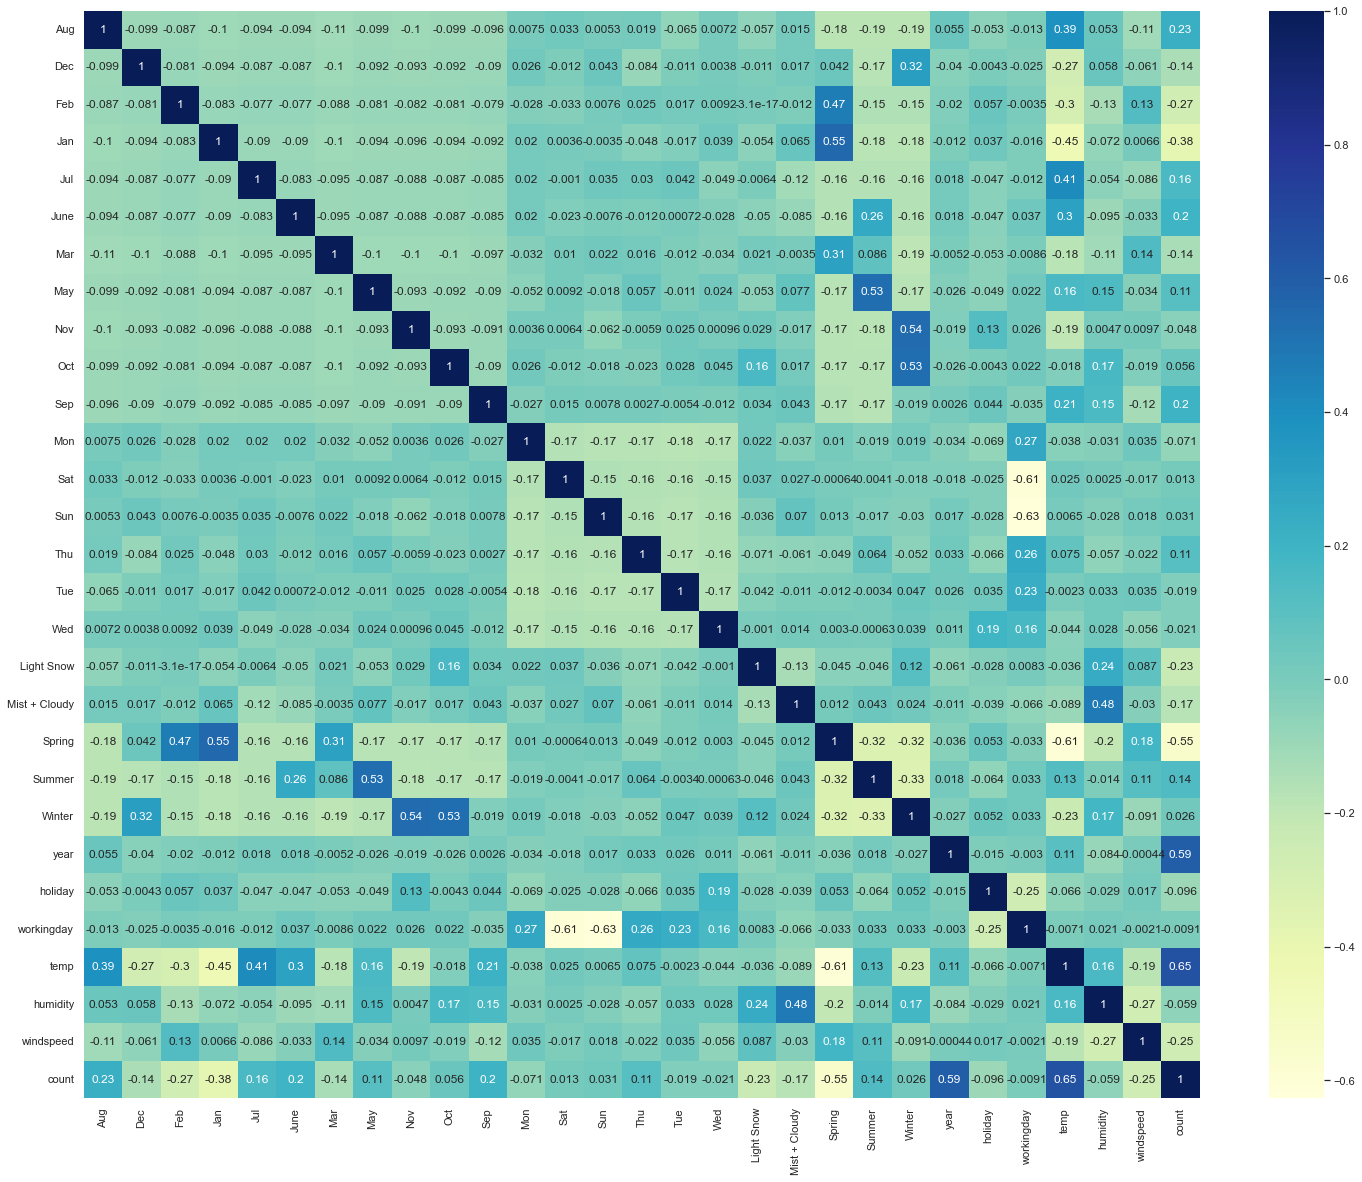

In [33]:
plt.figure(figsize=(25, 20))
sns.heatmap(bike_train_df.corr(),cmap='YlGnBu',annot = True)
plt.show()

- We see that in August & September the count of rental bikes goes up 
- Temperature and year seems to be fairly correlated to the Target (count) variable. 
- Spring has negative correlation with count

##### Dividing data into X and Y sets for Model Building

In [34]:
y_train = bike_train_df.pop('count')

In [35]:
X_train_new = bike_train_df

In [36]:
X_train_new.head()

,Aug,Dec,Feb,Jan,Jul,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0.245101,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475
111,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0.345824,0.751824,0.380981


In [37]:
print(X_train_new.shape)
print(y_train.shape)

(510, 28)
(510,)


In [38]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: count, dtype: float64

### Model Building 

###### Using LinearRegression function from SciKit Learn for its compatibility with RFE.  

In [39]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [40]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train_new, y_train)

rfe = RFE(lm, n_features_to_select = 15)             
rfe = rfe.fit(X_train_new, y_train)

In [41]:
list(zip(X_train_new.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [42]:
# Columns where RFE support is True
col_1 = X_train_new.columns[rfe.support_]
col_1

Index(['Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'Spring', 'Summer', 'Winter', 'year', 'holiday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [43]:
(rfe.support_==True).sum()

15

In [44]:
# Columns where RFE support is False
col_2 = X_train_new.columns[~rfe.support_]
col_2

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday'],
      dtype='object')

In [45]:
(rfe.support_==False).sum()

13

In [46]:
# Creating new train dataframe with RFE selected features
X_train_rfe = X_train_new[col_1]
X_train_rfe.head()

,Dec,Jan,Jul,Nov,Sep,Light Snow,Mist + Cloudy,Spring,Summer,Winter,year,holiday,temp,humidity,windspeed
576,0,0,1,0,0,0,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,0,0,0,0,0,0,1,1,0,0,1,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,0,0,1,0,0,1,0,0.245101,0.498067,0.663106
482,0,0,0,0,0,0,1,0,1,0,1,0,0.395666,0.504508,0.188475
111,0,0,0,0,0,0,1,0,1,0,0,0,0.345824,0.751824,0.380981


##### Linear Model 1

In [47]:
# Using statsmodel to build an optimized model; import library and add constant 

import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_rfe)

In [48]:
# Run the model

lm1 = sm.OLS(y_train, X_train_lm1).fit()

lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          8.15e-189
Time:                        23:26:29   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859      0.000       0.249       0.391
Dec              -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan              -0.0434      0.018     -2.393      0.017      -0.079      -0.008
Jul              -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov              -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep               0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow       -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
Spring           -0.0613      0.021     -2.881      0.004      -0.103      -0.019
Summer            0.0423      0.015      2.761      0.006       0.012       0.072
Winter            0.1019      0.018      5.656      0.000       0.067       0.137
year              0.2304      0.008     28.487      0.000       0.215       0.246
holiday          -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp              0.4815      0.037     13.005      0.000       0.409       0.554
humidity         -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed        -0.1887      0.026     -7.315      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Check VIF 

In [49]:
# Import library to check VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,30.89
12,temp,17.79
14,windspeed,4.72
7,Spring,4.37
9,Winter,4.06
8,Summer,2.82
6,Mist + Cloudy,2.32
10,year,2.09
3,Nov,1.85
1,Jan,1.75


##### Linear Model 2 
- Eleminating humidity variable due to it's very high VIF; as all p-values < 0.05

In [50]:
X_train_rfe2 = X_train_rfe.drop('humidity', axis = 1)

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lm2 = sm.OLS(y_train, X_train_lm2).fit()

lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          4.75e-186
Time:                        23:26:37   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2450      0.032      7.618      0.000       0.182       0.308
Dec              -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Jan              -0.0500      0.018     -2.719      0.007      -0.086      -0.014
Jul              -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Nov              -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Sep               0.0687      0.017      4.015      0.000       0.035       0.102
Light Snow       -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Mist + Cloudy    -0.0801      0.009     -9.198      0.000      -0.097      -0.063
Spring           -0.0713      0.021     -3.314      0.001      -0.113      -0.029
Summer            0.0349      0.015      2.251      0.025       0.004       0.065
Winter            0.0869      0.018      4.831      0.000       0.052       0.122
year              0.2345      0.008     28.687      0.000       0.218       0.251
holiday          -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp              0.4387      0.036     12.093      0.000       0.367       0.510
windspeed        -0.1585      0.025     -6.276      0.000      -0.208      -0.109
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Check VIF's  
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,5.17
13,windspeed,4.67
9,Winter,2.95
7,Spring,2.89
8,Summer,2.24
10,year,2.07
3,Nov,1.81
1,Jan,1.66
2,Jul,1.59
6,Mist + Cloudy,1.57


##### Linear Model 3 
- Eliminating Nov due to it's seemingly high p-value

In [52]:
X_train_rfe3 = X_train_rfe2.drop('Nov', axis = 1)

# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lm3 = sm.OLS(y_train, X_train_lm3).fit()

lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          2.74e-186
Time:                        23:26:44   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2283      0.031      7.310      0.000       0.167       0.290
Dec              -0.0283      0.016     -1.731      0.084      -0.060       0.004
Jan              -0.0451      0.018     -2.467      0.014      -0.081      -0.009
Jul              -0.0499      0.019     -2.686      0.007      -0.086      -0.013
Sep               0.0742      0.017      4.373      0.000       0.041       0.108
Light Snow       -0.2878      0.025    -11.677      0.000      -0.336      -0.239
Mist + Cloudy    -0.0793      0.009     -9.089      0.000      -0.096      -0.062
Spring           -0.0632      0.021     -2.979      0.003      -0.105      -0.022
Summer            0.0404      0.015      2.635      0.009       0.010       0.070
Winter            0.0774      0.017      4.438      0.000       0.043       0.112
year              0.2343      0.008     28.573      0.000       0.218       0.250
holiday          -0.0982      0.026     -3.783      0.000      -0.149      -0.047
temp              0.4581      0.035     13.031      0.000       0.389       0.527
windspeed        -0.1594      0.025     -6.291      0.000      -0.209      -0.110
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Check VIF's  
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.14
12,windspeed,4.62
6,Spring,2.89
7,Summer,2.24
9,year,2.07
8,Winter,2.05
1,Jan,1.65
2,Jul,1.59
5,Mist + Cloudy,1.57
3,Sep,1.34


##### Linear Model 4 
- Eliminating Dec due to it's high p-value.

In [54]:
X_train_rfe4 = X_train_rfe3.drop('Dec', axis = 1)

# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lm4 = sm.OLS(y_train, X_train_lm4).fit()

lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          8.14e-187
Time:                        23:26:50   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2154      0.030      7.088      0.000       0.156       0.275
Jan              -0.0383      0.018     -2.138      0.033      -0.073      -0.003
Jul              -0.0503      0.019     -2.706      0.007      -0.087      -0.014
Sep               0.0764      0.017      4.506      0.000       0.043       0.110
Light Snow       -0.2854      0.025    -11.575      0.000      -0.334      -0.237
Mist + Cloudy    -0.0793      0.009     -9.067      0.000      -0.096      -0.062
Spring           -0.0617      0.021     -2.905      0.004      -0.103      -0.020
Summer            0.0434      0.015      2.845      0.005       0.013       0.073
Winter            0.0757      0.017      4.335      0.000       0.041       0.110
year              0.2343      0.008     28.517      0.000       0.218       0.250
holiday          -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp              0.4721      0.034     13.772      0.000       0.405       0.539
windspeed        -0.1549      0.025     -6.135      0.000      -0.205      -0.105
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Check VIF's  
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.13
11,windspeed,4.62
5,Spring,2.75
6,Summer,2.24
8,year,2.07
7,Winter,1.78
0,Jan,1.61
1,Jul,1.59
4,Mist + Cloudy,1.56
2,Sep,1.34


##### Linear Model 5 
- Eliminating Jan due to it's fairly high p-value than others

In [56]:
X_train_rfe5 = X_train_rfe4.drop('Jan', axis = 1)

# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Create a first fitted model
lm5 = sm.OLS(y_train, X_train_lm5).fit()

lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          5.06e-187
Time:                        23:26:56   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746      0.000       0.141       0.258
Jul              -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep               0.0768      0.017      4.517      0.000       0.043       0.110
Light Snow       -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Mist + Cloudy    -0.0802      0.009     -9.146      0.000      -0.097      -0.063
Spring           -0.0672      0.021     -3.175      0.002      -0.109      -0.026
Summer            0.0465      0.015      3.051      0.002       0.017       0.076
Winter            0.0817      0.017      4.730      0.000       0.048       0.116
year              0.2336      0.008     28.352      0.000       0.217       0.250
holiday          -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp              0.4910      0.033     14.770      0.000       0.426       0.556
windspeed        -0.1479      0.025     -5.887      0.000      -0.197      -0.099
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Check VIF's  
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
5,Summer,2.23
4,Spring,2.08
7,year,2.07
6,Winter,1.78
0,Jul,1.58
3,Mist + Cloudy,1.55
1,Sep,1.34
2,Light Snow,1.08


##### Linear Model 6 
- Dropping windspeed by looking at high VIF and negative correlation with count

In [58]:
X_train_rfe6 = X_train_rfe5.drop('windspeed', axis = 1)

# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe6)

# Create a first fitted model
lm6 = sm.OLS(y_train, X_train_lm6).fit()

lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          5.71e-181
Time:                        23:27:01   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1501      0.029      5.124      0.000       0.093       0.208
Jul              -0.0523      0.019     -2.715      0.007      -0.090      -0.014
Sep               0.0812      0.018      4.623      0.000       0.047       0.116
Light Snow       -0.2989      0.025    -11.756      0.000      -0.349      -0.249
Mist + Cloudy    -0.0785      0.009     -8.669      0.000      -0.096      -0.061
Spring           -0.0766      0.022     -3.514      0.000      -0.119      -0.034
Summer            0.0367      0.016      2.342      0.020       0.006       0.067
Winter            0.0829      0.018      4.642      0.000       0.048       0.118
year              0.2326      0.009     27.333      0.000       0.216       0.249
holiday          -0.1003      0.027     -3.721      0.000      -0.153      -0.047
temp              0.5029      0.034     14.670      0.000       0.436       0.570
==============================================================================
Omnibus:                       66.927   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.674
Skew:                          -0.678   Prob(JB):                     1.74e-36
Kurtosis:                       5.431   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Check VIF's  
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.22
7,year,2.06
5,Summer,1.94
0,Jul,1.58
6,Winter,1.57
3,Mist + Cloudy,1.55
4,Spring,1.40
1,Sep,1.34
2,Light Snow,1.07
8,holiday,1.04


##### Linear Model 6 is our best model; all the variables have VIF's less than 5 and p-values are well within an acceptable range; we will go ahead and make our predictions using this model. 


- Hypothesis testing -> H0 : B1 = 0 and H1 : B1!=0
- From the lm6 model summary, it is evident that all our coefficients are not equal to zero, which means we REJECT the NULL HYPOTHESIS
- R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale. And we have the R-square value of 82.4%
- The adjusted R-squared adjusts for the number of terms in the model which is 82% for our model.
- F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.
- F-statistic: 233.3
- The F-Statistics value of 233.3 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

##### The equation for best fiited line based on Linear Model 6 can be explained by : 

count = 0.1501 + (0.5029 * temp) + (0.2326 * year) + (0.0367 * Summer) - (0.0523 * Jul) + (0.0829 * Winter) - (0.0785 * Mist+Cloudy) - (0.0766 * Spring) + (0.0812 * Sep) - (0.2989 * Light Snow) - (0.1003 * holiday)

###### Interpretations of few coefficients :- 

- const: The Constant value of ‘0.1501’ indicated that, in the absence of all other predictor variables, the bike demand still increases by 0.0417 units.

- temp: A coefficient value of ‘0.5029’ indicate a unit increase in temp variable, increases the bike demand by 0.5029 units.
- Summer: A coefficient value of ‘0.0367’ indicate a unit increase in Summer variable, increases bike demand by 0.0367 units. 


### Validating Assumptions of Linear Regression Model

##### Normality of Error Terms 

- We will check if the error terms are normally distributed;plotting a histogram. 

In [60]:
y_train_pred = lm6.predict(X_train_lm6)

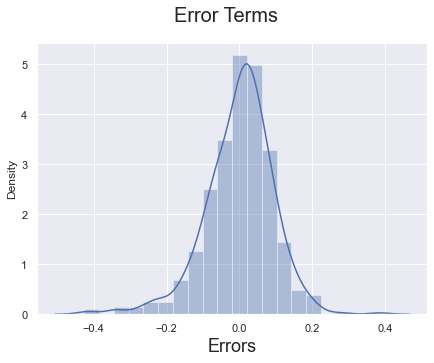

In [61]:
# Residual calculations
res = y_train - y_train_pred

# Plot the graph for error terms 
fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        
plt.xlabel('Errors', fontsize = 18)
plt.show()

-  We see that error terms are normally distributed. Hence, our assumption of Linear regression is valid. 


##### Linear Relationship 

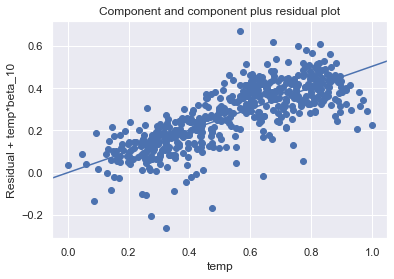

In [62]:
sm.graphics.plot_ccpr(lm6, 'temp')
plt.show()

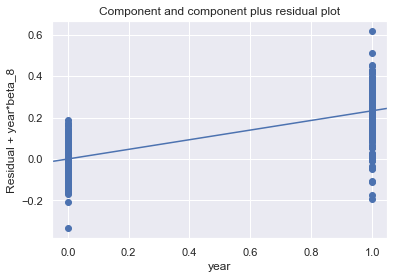

In [63]:
sm.graphics.plot_ccpr(lm6, 'year')
plt.show()

- As we can see, linearity is well preserved

##### Homoscedasticity

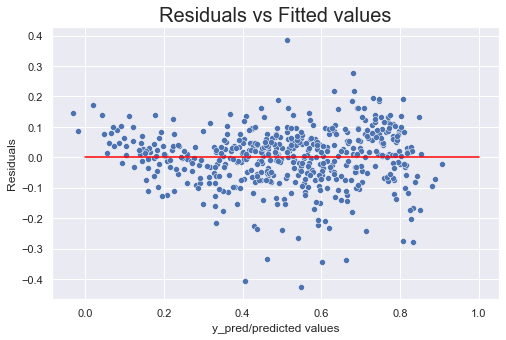

In [64]:
plt.figure(figsize = [8,5])
p = sns.scatterplot(y_train_pred, res) # res = y_train - y_train_pred
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs Fitted values', fontsize = 20)

- There is no visible pattern in residual values, thus homoscedacity is well preserved

##### Absence of Multicolineariry

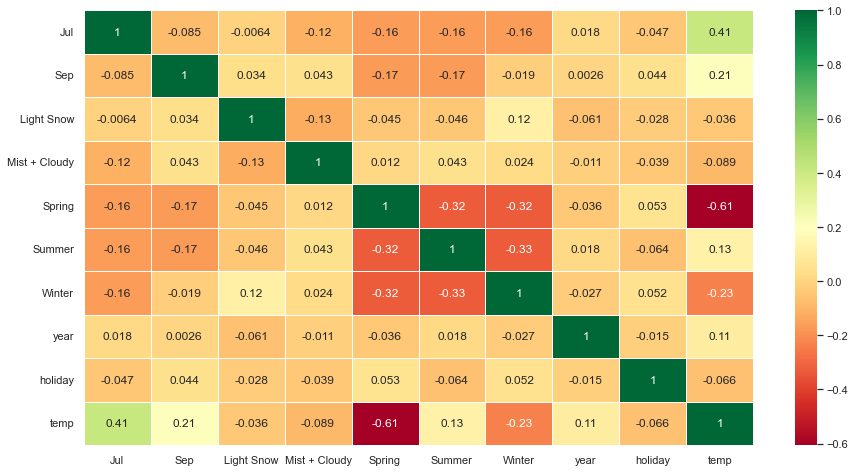

In [65]:
# Check Multicolinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe6.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

- We don't see any multicolinearity as our Model has VIF's < 5 (Refer Linear Model 6)

### Making Prediction using Final Model

#### Applying the scaling on the test dataset

- we will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data.In other words, we want to prevent the information leak from train to test dataset.

In [66]:
# Create list of all numeric variables
num_vars=['temp','humidity','windspeed','count']

# Fit on data
bike_test_df[num_vars] = scaler.transform(bike_test_df[num_vars])
bike_test_df.head()

,Aug,Dec,Feb,Jan,Jul,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [67]:
bike_test_df.describe()

,Aug,Dec,Feb,Jan,Jul,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


##### Dividing test set into X_test and y_test sets for the model building

In [68]:
y_test = bike_test_df.pop('count')
X_test = bike_test_df

print(y_test.shape)
print(X_test.shape)

(220,)
(220, 28)


In [69]:
#Selecting the variables that were part of final model (Linear Model 6)
col_test = X_train_rfe6.columns

X_test = X_test[col_test]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.head()

,const,Jul,Sep,Light Snow,Mist + Cloudy,Spring,Summer,Winter,year,holiday,temp
184,1.0,1,0,0,1,0,0,0,0,1,0.831783
535,1.0,0,0,0,0,0,1,0,1,0,0.901354
299,1.0,0,0,0,1,0,0,1,0,0,0.511964
221,1.0,0,0,0,0,0,0,0,0,0,0.881625
152,1.0,0,0,0,0,0,1,0,0,0,0.817246


In [70]:
# Making prediction using Linear Model 6

y_test_pred = lm6.predict(X_test_lm6)

### Model Evaluation 

##### Plotting y_test and y_test_pred 

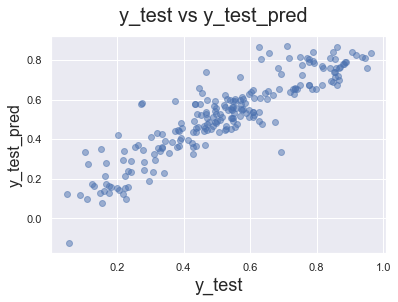

In [71]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)           
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

- There's a linear relationship between y_test and y_test_pred


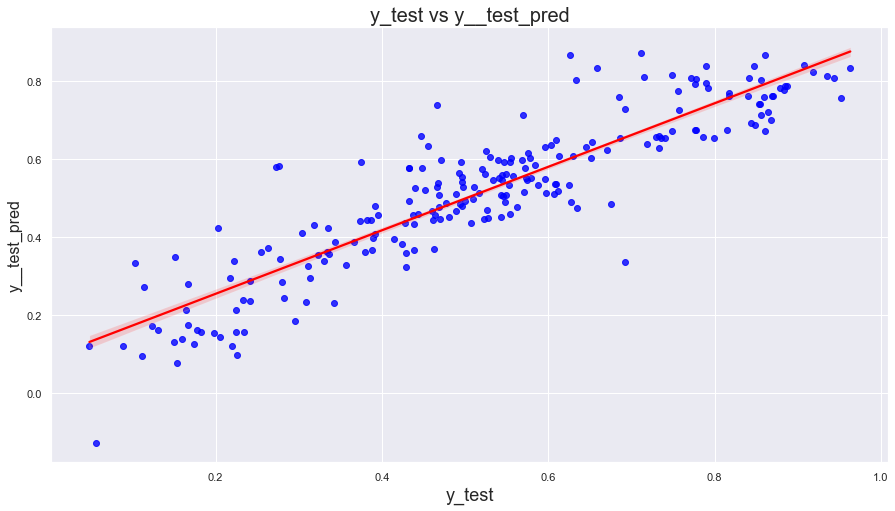

In [72]:
# Visualizing fir on the test datasets by plotting a regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y__test_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y__test_pred', fontsize=16)                          
plt.show()


There's linear relationship between y_test and y_test_pred

###### Calculating R-squared and adjusted R-squared for Test Datasets

In [73]:
# R-squared
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Train Data R^2 :' , round((r2_train*100),2))
print('Test Data R^2 :' , round((r2_test*100),2))

Train Data R^2 : 82.38
Test Data R^2 : 80.93


- Difference between R^2 train and test : 1.45% 

###### Adjr2 = 1-(1-R2)*(n-1)/(n-p-1)

In [74]:
# Adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]

n_train = X_train_rfe6.shape[0]
p_train = X_train_rfe6.shape[1]

adjusted_r2_test = round((1-(1-r2_test)*(n-1)/(n-p-1)),4)
adjusted_r2_train = round((1-(1-r2_train)*(n_train-1)/(n_train-p_train-1)),4)

print('Train Data Adjusted R^2 :', round((adjusted_r2_train*100),2))
print('Test Data Adjusted R^2 :', round((adjusted_r2_test*100),2))

Train Data Adjusted R^2 : 82.03
Test Data Adjusted R^2 : 80.01


- Difference between Adjusted R^2 train and test : 2.02 which is < 5 %

### Model Summary

- We see that *temp* has the highest coefficient this indicates temeperature has significant impact on bike rentals. 
- A value of coefficient '0.2326' implies that bike rental numbers are increasing *year* wise. 
- Looking at the coefficient value of *Light Snow* variable it seems people tend to deter from renting out bikes during this     time.
- It is advised to increase bike availability and promotions during *Summer* to attract more bookings. 
- We can see spring season has negative coefficients and negatively correlated to bike rentals. So we can give some offers       there to increase the demand. 
- Now seeing at weathersit variable, we have got negative coefficient for *Mist + Cloudy* weather; we could give discounts on bike bookings to gain customers.

Above variables are good predictors for achieving maximum bike rental bookings. 